# Fully-unbinned analysis

This notebook checks the fully-optimal sensitivity that can be achieved by extracting the maximum possible information from each event, i.e. fully calculate the density ratio between null and alternate hypotheses.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import hstar
import inference

In [ ]:
process = hstar.gghzz.Process(
  (1.5572420 * 1.83, '/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_all/events.csv', 10000), 
  (0.57423204 * 1.83, '/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4e_all/events.csv', 10000), 
  (0.57423204 * 1.83, '/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4m_all/events.csv', 10000), 
  )

# Unbinned likelihood analysis

Return to the per-event likelihood:

$$ \mathcal{L} (\mathcal{D} | c_6) = \frac{}{} \prod_i^{N} p(x_i | c_6),$$

where $N$ is the total number of events observed, and $p(x_i | c_6)$ is the probability (density) of the event under some hypothesis given by value of $c_6$.
Given that the simulated dataset is that of the SM and the task is to constrain $c_6$, the best test statistic is given by the (negative log) likelihood ratio:

$$ t_\mu = - \log \left(\frac{\mathcal{L} (\mathcal{D} | c_6)}{\mathcal{L} (\mathcal{D} | c_6 = 0)} \right) = \frac{}{} \prod_i^{N} \frac{p(x_i | c_6)}{p_\mathrm{SM}(x_i)},$$

where $p_\mathrm{SM}(x_i) = p(x_i | c_6 = 0)$. Therefore, one must compute this *density ratio* 

$$OO_{\mu} = \frac{p(x_i | c_6)}{p_\mathrm{SM}(x_i)}.$$

Its computation for a set of events in a simulated dataset under different $c_6$ values is as follows:
- The matrix element (squared) factor of the event weight to have a quartic polynomial dependence on $c_6$, where $c_6 = 0$ corresponds to the SM case: $|\mathcal{M}(x_i | c_6)|^2 = |\mathcal{M}_\mathrm{SM}(x_i)|^2 \cdot f_i(c_6) = |\mathcal{M}_\mathrm{SM}(x_i)|^2 \cdot (1 + a_{1, i} c_6 + a_{2, i} c_6^2 + a_{3,i} c_6^3 + a_{4,i} c_6^4)$.
- Since the rest of the event weight from parton distribution functions and Monte Carlo sampling factorizes out without any $c_6$ dependence, its $c_6$-dependence also follows as $w_i(c_6) = w_{i,\mathrm{SM}} \times f_i(c_6)$.
- The probability of any given event is then given by $p(x_i | c_6) = w(x_i | c_6) / \sum_i w(x_i | c_6)$.
Under any given SM or $c_6$-valued scenario, the sum of the probabilities of all the events in the simulated dataset sum up to unity, $\sum_i p(x_i | c_6) = 1.$

In [ ]:
c6_vals = np.linspace(-10.0, 15.0, 41)
modifier = hstar.c6.Modifier( hstar.msq.Component.SBI, c6_values = [-5, -1, 0, 1, 5] )
wt_c6, prob_c6 = modifier.modify( process, c6_vals )

cH_vals = np.linspace(-0.02, 0.02, 41)

nu_sm = np.sum( sample.reweight(process.Basis.SBI) )
nu_h3 = np.sum( wts_h3, axis=0 )


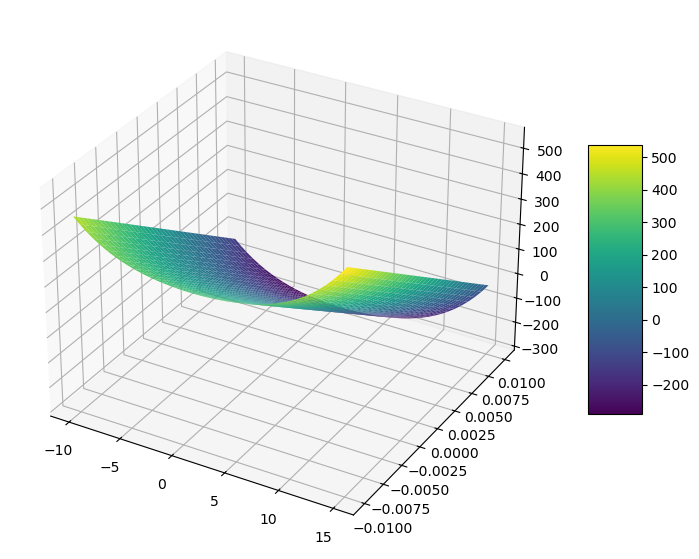

In [4]:
X, Y = np.meshgrid(c6_vals, cH_vals)
Z = nu_h3 - nu_sm[np.newaxis,np.newaxis]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [5]:
prob_sm = wts_sm / nu_sm
prob_h3 = wts_h3 / nu_h3
pratio =  prob_h3 / prob_sm[:,np.newaxis,np.newaxis]

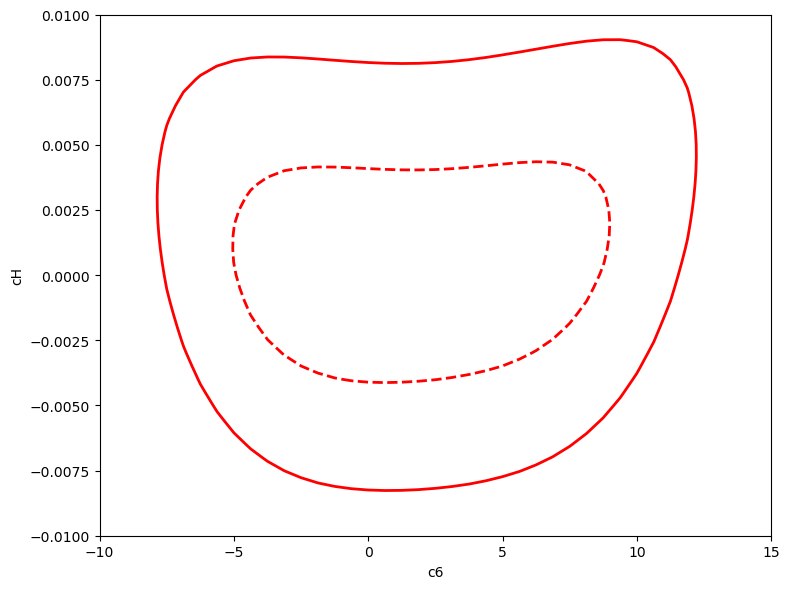

In [6]:
importlib.reload(nll)
nllr = nll.ratio(wts_h3, wts_sm)
scanner = nll.Scanner(c6_vals, cH_vals, nllr) 
scanner.val()

nsigma=2

c6_scan, cH_scan = np.meshgrid(c6_vals, cH_vals)

# Plot the filled contour
plt.figure(figsize=(8, 6))
# contour = plt.contourf(c6_scan, cH_scan, nllr, levels=np.linspace(nllr.min(), nllr.max(), 50), cmap='viridis', extend='both')

# Plot the boundary of the region where Z < Z_max using contour
plt.contour(c6_scan, cH_scan, nllr, levels=[1,nsigma**2], colors='red', linewidths=2, linestyles=['--','-'])

# Add a colorbar to the contour plot
# plt.colorbar(contour)

# Set the title and labels
plt.xlabel('c6')
plt.ylabel('cH')

plt.tight_layout()
plt.show()


In [7]:
c6_vals = np.round(c6_vals, decimals = 1)
df = pd.DataFrame({'c6' : c6_vals, 'nll' : nll} )
df.to_csv('nll-full.csv', index=False)